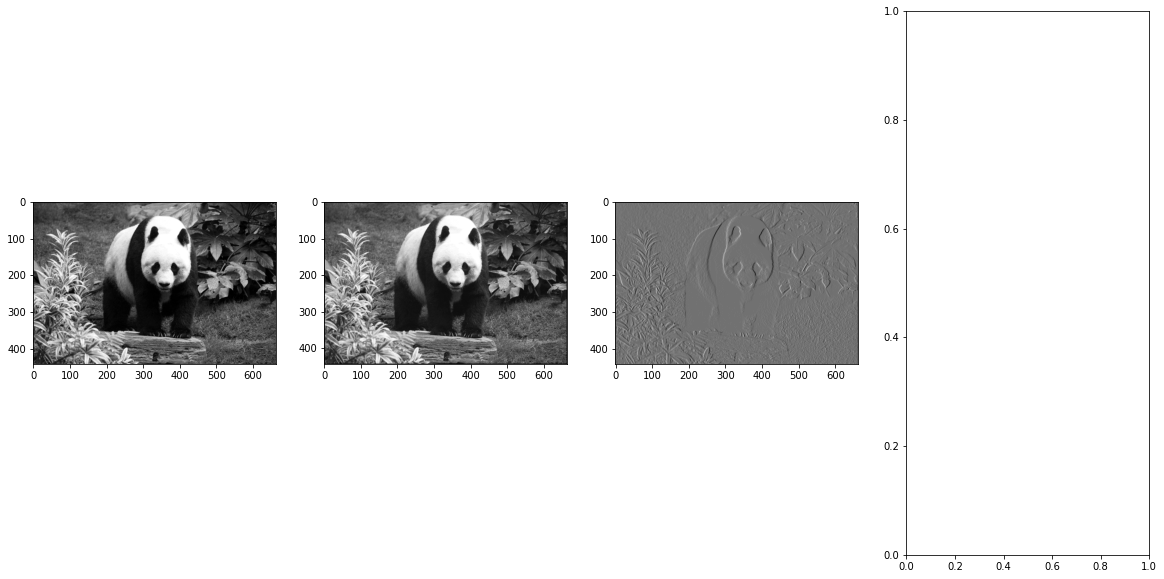

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


if __name__ == "__main__":
    image = cv2.imread('../images/panda.png')
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    kernel = np.array([[-1, 0, +1],
                      [-2, 0, +2],
                      [-1, 0, +1]])

    image_padded, conv_image = convolution(image, kernel)

    f, (ax0,ax1,ax2,ax3) = plt.subplots(1, 4, figsize=(20,10))
    ax0.imshow(image, cmap='gray')
    ax1.imshow(image_padded, cmap='gray')
    ax2.imshow(conv_image, cmap='gray')
